In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [64]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [65]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

In [66]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

#### Визуализируем данные

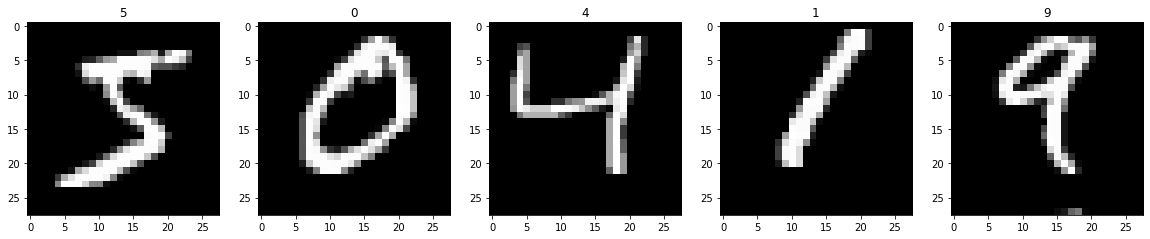

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train[0:5], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_train[i - 1]);

### Строим модель

In [77]:
model = keras.Sequential([
    keras.layers.Conv2D(
        filters = 6,
        kernel_size = (5,5),
        padding = 'same',
        activation = 'relu',
        input_shape = x_train.shape[1:]),
    keras.layers.MaxPool2D(
        pool_size = (2,2),
        padding = 'valid'),
    
    keras.layers.Conv2D(
        filters = 16,
        kernel_size = (5,5),
        padding = 'same',
        activation = 'relu',
        input_shape = train.shape[1:]),
    keras.layers.MaxPool2D(
        pool_size = (2,2),
        padding = 'valid'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')    
])

In [78]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 32)               

#### One-hot для таргета

In [67]:
y_train_labels = tf.keras.utils.to_categorical(y_train)

### Обучение

In [81]:
model.fit(
    x_train,
    y_train_labels,
    batch_size=32,
    epochs = 5,
    validation_split=0.2
)

Epoch 1/5
840/840 [==============================] - 58s 69ms/step - loss: 0.3638 - accuracy: 0.9000 - val_loss: 0.1843 - val_accuracy: 0.9490
Epoch 2/5
840/840 [==============================] - 61s 73ms/step - loss: 0.1343 - accuracy: 0.9609 - val_loss: 0.1546 - val_accuracy: 0.9597
Epoch 3/5
840/840 [==============================] - 62s 74ms/step - loss: 0.0898 - accuracy: 0.9728 - val_loss: 0.1182 - val_accuracy: 0.9674
Epoch 4/5
840/840 [==============================] - 63s 76ms/step - loss: 0.0685 - accuracy: 0.9784 - val_loss: 0.1060 - val_accuracy: 0.9711
Epoch 5/5
840/840 [==============================] - 64s 77ms/step - loss: 0.0620 - accuracy: 0.9806 - val_loss: 0.1745 - val_accuracy: 0.9570


In [84]:
y_val_labels = tf.keras.utils.to_categorical(y_val)
model.evaluate(x_val, y_val_labels)

263/263 [==============================] - 8s 29ms/step - loss: 0.1560 - accuracy: 0.9573


[0.15597563982009888, 0.9572619199752808]

In [85]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1)

print('Accuracy: %s' % accuracy_score(y_val, y_pred_labels))

Accuracy: 0.9572619047619048


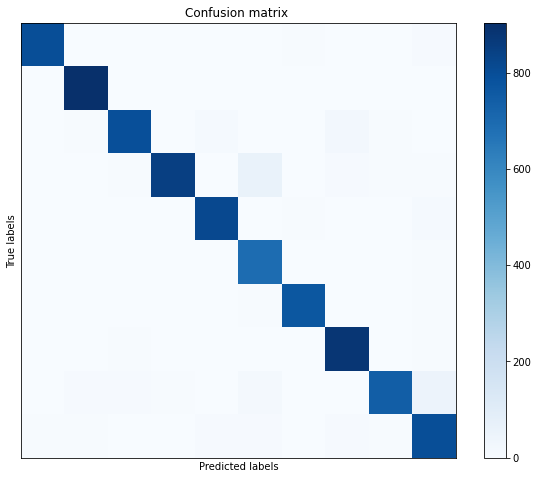

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()